In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
import csv
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Mushroom Dataset

In [4]:
mushroom = pd.read_csv("mushroom_numerical.csv", sep=',')
data = mushroom.iloc[:,0:22]
labels = mushroom.iloc[:,22].astype(str)

             precision    recall  f1-score   support

          p       0.82      0.99      0.90      1747
          e       0.97      0.66      0.78      1075

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8610914245216159


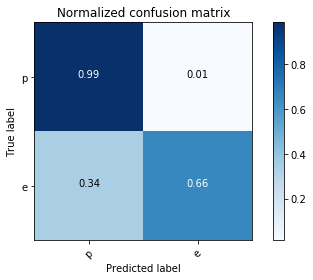

             precision    recall  f1-score   support

          p       0.82      0.99      0.90      1741
          e       0.97      0.65      0.78      1081

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8582565556343019


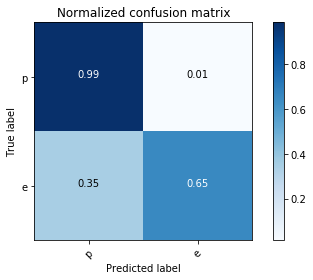

             precision    recall  f1-score   support

          p       0.82      0.99      0.89      1728
          e       0.97      0.65      0.78      1094

avg / total       0.87      0.86      0.85      2822

accuracy:  0.8554216867469879


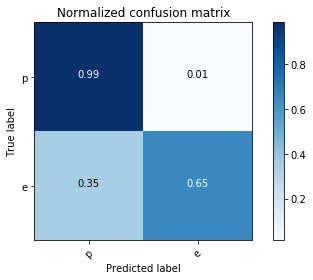

             precision    recall  f1-score   support

          p       0.83      0.99      0.90      1760
          e       0.97      0.66      0.79      1062

avg / total       0.88      0.86      0.86      2822

accuracy:  0.8639262934089298


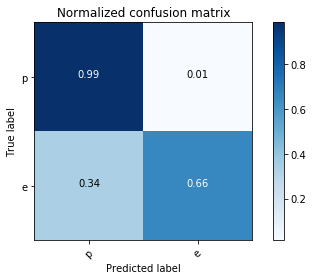

             precision    recall  f1-score   support

          p       0.82      0.99      0.89      1714
          e       0.97      0.66      0.79      1108

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8589652728561304


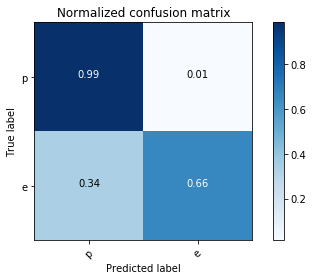

             precision    recall  f1-score   support

          p       0.83      0.99      0.90      1774
          e       0.96      0.65      0.78      1048

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8603827072997874


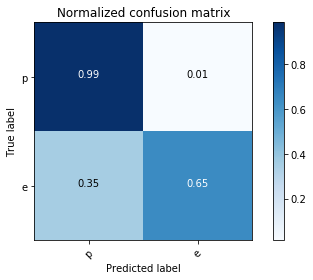

             precision    recall  f1-score   support

          p       0.82      0.99      0.90      1739
          e       0.96      0.65      0.78      1083

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8579021970233877


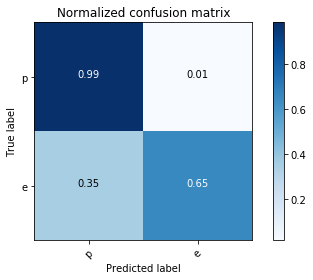

             precision    recall  f1-score   support

          p       0.82      0.99      0.90      1749
          e       0.97      0.66      0.78      1073

avg / total       0.88      0.86      0.85      2822

accuracy:  0.8614457831325302


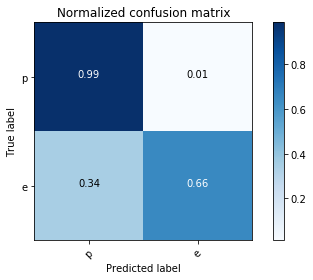

             precision    recall  f1-score   support

          p       0.82      0.99      0.89      1767
          e       0.96      0.64      0.77      1055

avg / total       0.87      0.85      0.85      2822

accuracy:  0.8547129695251595


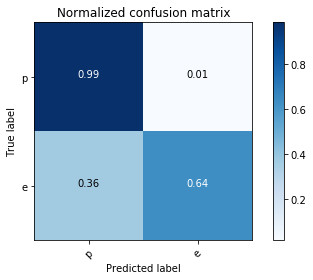

             precision    recall  f1-score   support

          p       0.83      0.99      0.90      1721
          e       0.97      0.67      0.80      1101

avg / total       0.88      0.86      0.86      2822

accuracy:  0.8646350106307583


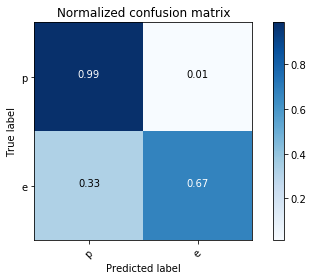

In [5]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Appendicitis Dataset

In [6]:
appendicitis = pd.read_csv("appendicitis.csv", sep=',')
data = appendicitis.iloc[:,0:7]
labels = appendicitis.iloc[:,7].astype(str)

             precision    recall  f1-score   support

          1       0.92      0.88      0.90        40
          0       0.67      0.77      0.71        13

avg / total       0.86      0.85      0.85        53

accuracy:  0.8490566037735849


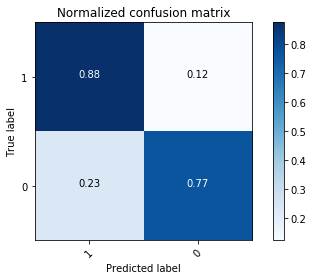

             precision    recall  f1-score   support

          1       0.91      0.89      0.90        45
          0       0.44      0.50      0.47         8

avg / total       0.84      0.83      0.83        53

accuracy:  0.8301886792452831


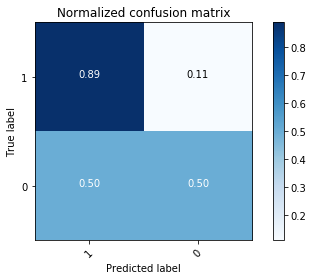

             precision    recall  f1-score   support

          1       0.97      0.86      0.92        44
          0       0.57      0.89      0.70         9

avg / total       0.91      0.87      0.88        53

accuracy:  0.8679245283018868


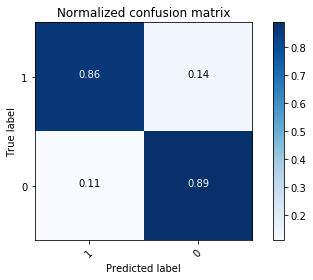

             precision    recall  f1-score   support

          1       0.87      0.95      0.91        41
          0       0.75      0.50      0.60        12

avg / total       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


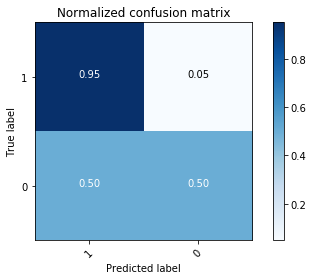

             precision    recall  f1-score   support

          1       0.93      0.89      0.91        44
          0       0.55      0.67      0.60         9

avg / total       0.86      0.85      0.85        53

accuracy:  0.8490566037735849


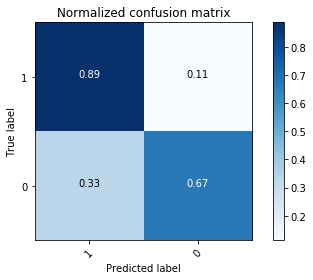

             precision    recall  f1-score   support

          1       0.90      0.88      0.89        41
          0       0.62      0.67      0.64        12

avg / total       0.84      0.83      0.83        53

accuracy:  0.8301886792452831


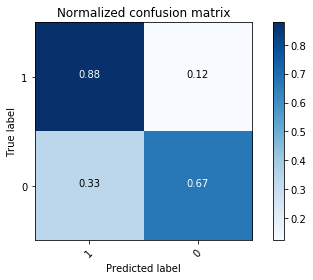

             precision    recall  f1-score   support

          1       0.93      0.91      0.92        43
          0       0.64      0.70      0.67        10

avg / total       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


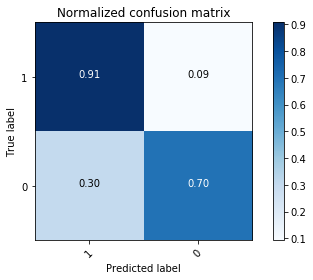

             precision    recall  f1-score   support

          1       0.90      0.90      0.90        42
          0       0.64      0.64      0.64        11

avg / total       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


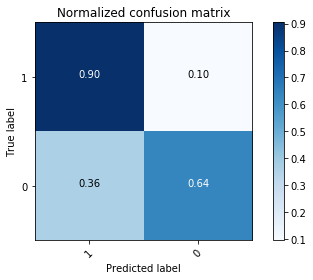

             precision    recall  f1-score   support

          1       0.93      0.91      0.92        43
          0       0.64      0.70      0.67        10

avg / total       0.87      0.87      0.87        53

accuracy:  0.8679245283018868


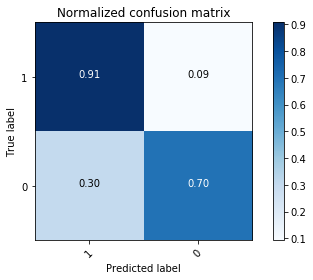

             precision    recall  f1-score   support

          1       0.90      0.90      0.90        42
          0       0.64      0.64      0.64        11

avg / total       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


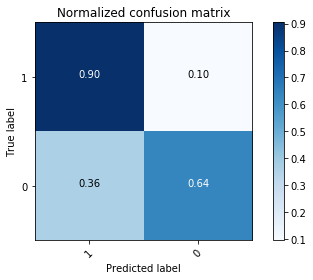

In [7]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model_poker = GaussianNB()
        dt_model_poker.fit(X_train, y_train)
        predicted = dt_model_poker.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Glass Dataset

In [9]:
glass = pd.read_csv("Glass.csv")
data = glass.iloc[:,0:9]
labels = glass.iloc[:,9].astype(str)

             precision    recall  f1-score   support

          1       0.46      0.71      0.56        31
          3       0.57      0.19      0.29        42
          2       0.33      0.62      0.43         8
          5       0.71      0.50      0.59        10
          7       0.33      1.00      0.50         2
          6       0.76      0.93      0.84        14

avg / total       0.56      0.51      0.48       107

accuracy:  0.514018691588785


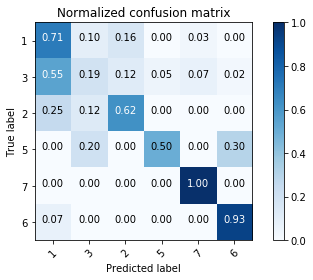

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        39
          3       0.43      0.18      0.25        34
          2       0.10      0.78      0.18         9
          5       0.00      0.00      0.00         3
          7       1.00      0.29      0.44         7
          6       0.76      0.87      0.81        15

avg / total       0.32      0.26      0.24       107

accuracy:  0.2616822429906542


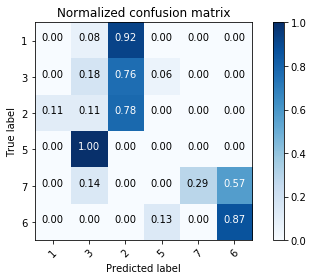

             precision    recall  f1-score   support

          1       0.44      0.11      0.17        37
          3       0.15      0.06      0.09        34
          2       0.09      0.62      0.16         8
          5       0.21      0.50      0.30         6
          7       1.00      0.20      0.33         5
          6       0.88      0.88      0.88        17

avg / total       0.41      0.28      0.27       107

accuracy:  0.2803738317757009


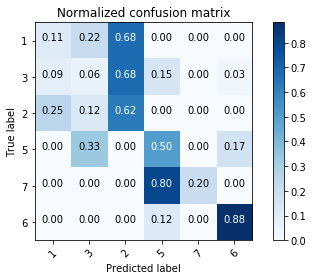

             precision    recall  f1-score   support

          1       0.40      0.76      0.53        33
          3       0.43      0.14      0.21        42
          2       0.50      0.11      0.18         9
          5       0.27      0.43      0.33         7
          7       0.57      1.00      0.73         4
          6       0.73      0.67      0.70        12

avg / total       0.46      0.44      0.39       107

accuracy:  0.4392523364485981


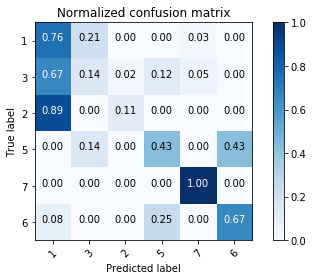

             precision    recall  f1-score   support

          1       0.44      0.11      0.18        35
          3       0.60      0.23      0.33        40
          2       0.15      0.75      0.25        12
          5       0.20      0.25      0.22         4
          7       0.56      1.00      0.71         5
          6       0.80      0.73      0.76        11

avg / total       0.50      0.34      0.33       107

accuracy:  0.3364485981308411


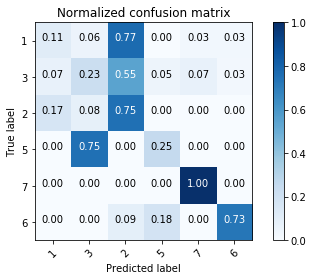

             precision    recall  f1-score   support

          1       0.53      0.46      0.49        35
          3       0.45      0.14      0.21        36
          2       0.14      0.60      0.22         5
          5       0.19      0.44      0.27         9
          7       0.67      0.50      0.57         4
          6       0.85      0.94      0.89        18

avg / total       0.52      0.44      0.44       107

accuracy:  0.4392523364485981


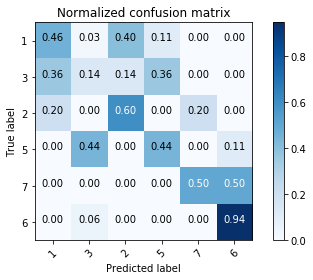

             precision    recall  f1-score   support

          1       0.50      0.03      0.05        39
          3       0.88      0.17      0.29        41
          2       0.06      0.80      0.10         5
          5       0.67      0.33      0.44         6
          7       0.50      1.00      0.67         3
          6       0.75      0.92      0.83        13

avg / total       0.66      0.27      0.28       107

accuracy:  0.27102803738317754


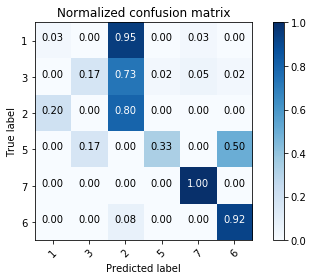

/home/eleni/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.44      0.90      0.60        31
          3       0.27      0.09      0.13        35
          2       0.33      0.08      0.13        12
          5       0.23      0.71      0.34         7
          7       0.00      0.00      0.00         6
          6       1.00      0.50      0.67        16

avg / total       0.42      0.42      0.35       107

accuracy:  0.4205607476635514


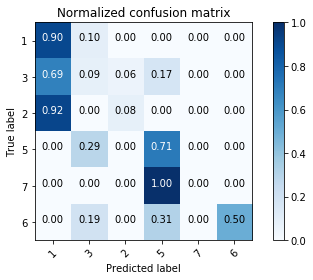

             precision    recall  f1-score   support

          1       0.52      0.61      0.56        36
          3       0.56      0.16      0.24        32
          2       0.09      0.22      0.13         9
          5       0.22      0.67      0.33         6
          7       0.86      1.00      0.92         6
          6       1.00      0.50      0.67        18

avg / total       0.58      0.45      0.46       107

accuracy:  0.4485981308411215


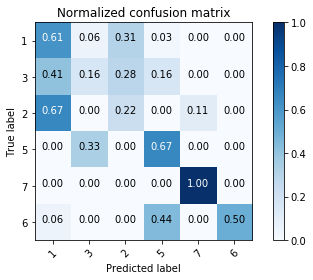

             precision    recall  f1-score   support

          1       0.38      0.65      0.48        34
          3       0.46      0.14      0.21        44
          2       0.00      0.00      0.00         8
          5       0.14      0.14      0.14         7
          7       0.43      1.00      0.60         3
          6       0.69      1.00      0.81        11

avg / total       0.40      0.40      0.35       107

accuracy:  0.40186915887850466


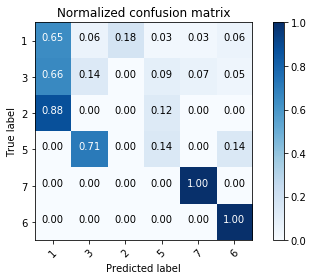

In [10]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(glass):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [12]:
print (acc)
with open("accNaiveBayesWithoutNoise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)

['Mushroom', 0.8610914245216159, 0.8582565556343019, 0.8554216867469879, 0.8639262934089298, 0.8589652728561304, 0.8603827072997874, 0.8579021970233877, 0.8614457831325302, 0.8547129695251595, 0.8646350106307583, 'Appendicitis', 0.8490566037735849, 0.8301886792452831, 0.8679245283018868, 0.8490566037735849, 0.8490566037735849, 0.8301886792452831, 0.8679245283018868, 0.8490566037735849, 0.8679245283018868, 0.8490566037735849, 'Glass', 0.514018691588785, 0.2616822429906542, 0.2803738317757009, 0.4392523364485981, 0.3364485981308411, 0.4392523364485981, 0.27102803738317754, 0.4205607476635514, 0.4485981308411215, 0.40186915887850466]
